In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
orders = pd.DataFrame({
    'order_id': range(1, 11),
    'customer_id': [101, 102, 101, 103, 104, 102, 101, 104, 103, 102],
    'order_date': pd.to_datetime([
        '2024-01-01', '2024-01-02', '2024-01-03',
        '2024-01-04', '2024-01-05', '2024-01-06',
        '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'
    ]),
    'revenue': [500, 300, 700, 200, 400, 350, 600, 450, 250, 380]
})

orders

,order_id,customer_id,order_date,revenue
0,1,101,2024-01-01,500
1,2,102,2024-01-02,300
2,3,101,2024-01-03,700
3,4,103,2024-01-04,200
4,5,104,2024-01-05,400
5,6,102,2024-01-06,350
6,7,101,2024-01-07,600
7,8,104,2024-01-08,450
8,9,103,2024-01-09,250
9,10,102,2024-01-10,380


In [3]:
total_revenue = orders['revenue'].sum()

average_order_value = orders['revenue'].mean()

total_revenue, average_order_value

(np.int64(4130), np.float64(413.0))

In [4]:
customer_metrics = orders.groupby('customer_id').agg(
    total_revenue=('revenue', 'sum'),
    orders_count=('order_id', 'count'),
    avg_order_value=('revenue', 'mean')
)

customer_metrics

,total_revenue,orders_count,avg_order_value
customer_id,,,
101,1800,3,600.000000
102,1030,3,343.333333
103,450,2,225.000000
104,850,2,425.000000


In [5]:
repeat_customers = customer_metrics[customer_metrics['orders_count'] > 1]

repeat_customers

,total_revenue,orders_count,avg_order_value
customer_id,,,
101,1800,3,600.000000
102,1030,3,343.333333
103,450,2,225.000000
104,850,2,425.000000


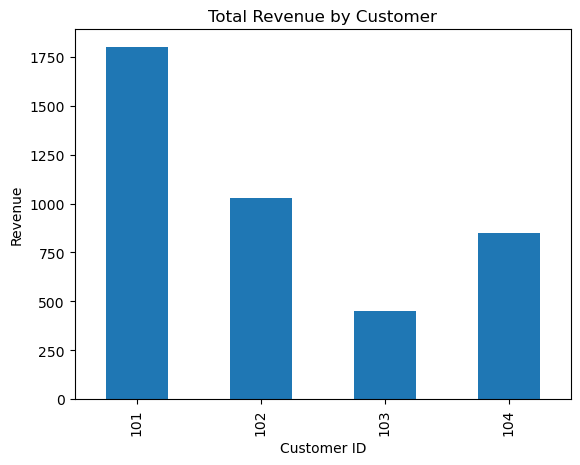

In [6]:
customer_metrics['total_revenue'].plot(kind='bar')
plt.title('Total Revenue by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()

In [7]:
print("Key insights:")
print("- Total revenue:", total_revenue)
print("- Average order value:", round(average_order_value, 2))
print("- Repeat customers:", len(repeat_customers))

Key insights:
- Total revenue: 4130
- Average order value: 413.0
- Repeat customers: 4
